In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import sklearn.metrics as skm
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE


In [3]:
data=pd.read_csv("Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv")

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
Dst Port             1048575 non-null int64
Protocol             1048575 non-null int64
Timestamp            1048575 non-null object
Flow Duration        1048575 non-null int64
Tot Fwd Pkts         1048575 non-null int64
Tot Bwd Pkts         1048575 non-null int64
TotLen Fwd Pkts      1048575 non-null int64
TotLen Bwd Pkts      1048575 non-null int64
Fwd Pkt Len Max      1048575 non-null int64
Fwd Pkt Len Min      1048575 non-null int64
Fwd Pkt Len Mean     1048575 non-null float64
Fwd Pkt Len Std      1048575 non-null float64
Bwd Pkt Len Max      1048575 non-null int64
Bwd Pkt Len Min      1048575 non-null int64
Bwd Pkt Len Mean     1048575 non-null float64
Bwd Pkt Len Std      1048575 non-null float64
Flow Byts/s          1046298 non-null object
Flow Pkts/s          1048575 non-null object
Flow IAT Mean        1048575 non-null float64
Flow IAT Std         1048575 non-null 

In [5]:
data.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


In [6]:
#data[~data.isnull()]

In [7]:
data1=data.sample(n=5000)

In [8]:
X=data1.drop(['Timestamp','Flow Duration','Idle Mean','Idle Std','Idle Max','Idle Min','Flow Pkts/s','Flow Byts/s'],axis =1).iloc[:,:-1]
X.head(10)

,Dst Port,Protocol,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min
353681,22,6,1,1,0,0,0,0,0.000000,0.000000,...,1,0,241,230,0,32,0.0,0.000000,0,0
626974,443,6,9,7,544,3520,194,0,60.444444,85.761459,...,7,3520,8192,115,4,20,0.0,0.000000,0,0
572132,80,6,3,4,161,488,161,0,53.666667,92.953393,...,4,488,8192,149,1,20,0.0,0.000000,0,0
571940,80,6,2,0,0,0,0,0,0.000000,0.000000,...,0,0,278,-1,0,20,0.0,0.000000,0,0
1014917,443,6,13,11,975,4690,343,0,75.000000,106.851143,...,11,4690,8192,64,7,20,118263.5,79372.029081,174388,62139
773541,59645,6,2,0,0,0,0,0,0.000000,0.000000,...,0,0,260,-1,0,20,0.0,0.000000,0,0
586708,3389,6,11,7,1132,1581,661,0,102.909091,197.772321,...,7,1581,8192,62868,5,20,0.0,0.000000,0,0
135445,21,6,1,1,0,0,0,0,0.000000,0.000000,...,1,0,26883,0,0,40,0.0,0.000000,0,0
190645,22,6,22,20,1992,2665,640,0,90.545455,138.109938,...,20,2665,26883,230,16,32,0.0,0.000000,0,0
959500,52928,6,2,1,38,0,38,0,19.000000,26.870058,...,1,0,31,0,0,20,0.0,0.000000,0,0


In [9]:
i=0
for col in X.columns:
 try:
     X[col] = X[col].astype(int)
 except ValueError:
    print('no ',col)

X.shape

(5000, 71)

In [10]:
print(X)
array_sum = np.sum(X)
array_has_nan = np.isnan(array_sum)
print(array_has_nan)


         Dst Port  Protocol  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
353681         22         6             1             1                0   
626974        443         6             9             7              544   
572132         80         6             3             4              161   
571940         80         6             2             0                0   
1014917       443         6            13            11              975   
...           ...       ...           ...           ...              ...   
328127         22         6            24            20             1912   
185231         22         6            21            22             1928   
991052         53        17             2             2               86   
982012         53        17             1             1               35   
8614           21         6             1             1                0   

         TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
353681 

(5000,)

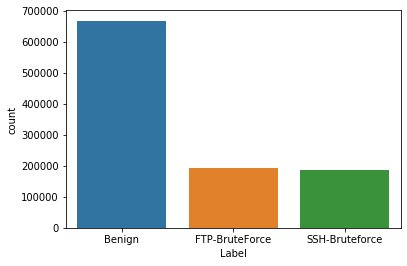

In [11]:
y=data1.iloc[:,-1]
sns.countplot(data['Label'])
y.shape

##### label encoding for dependent variable  0 is benign 1 is FTP-Bruteforce 2 is SSH-bruteforce

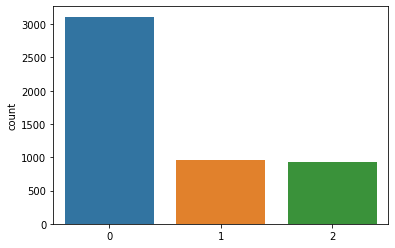

In [12]:
le=LabelEncoder()
y=le.fit_transform(y)
sns.countplot(y)


In [13]:
print(y)
array_sum = np.sum(y)
array_has_nan = np.isnan(array_sum)
print(array_has_nan)

[2 0 0 ... 0 0 1]
False


In [14]:
from collections import Counter


def plot_resampling(X, y, sampler, ax):
    """Plot the resampled dataset using the sampler."""
    X_res, y_res = sampler.fit_resample(X, y)
    ax.scatter(X_res[:, 0], X_res[:, 1], c=y_res, alpha=0.8, edgecolor="k")
    sns.despine(ax=ax, offset=10)
    ax.set_title(f"Decision function for {sampler.__class__.__name__}")
    return Counter(y_res)

import numpy as np


def plot_decision_function(X, y, clf, ax):
    """Plot the decision function of the classifier and the original data"""
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor="k")
    ax.set_title(f"Resampling using {clf[0].__class__.__name__}")


D:\anaconda\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


TypeError: '(slice(None, None, None), 0)' is an invalid key

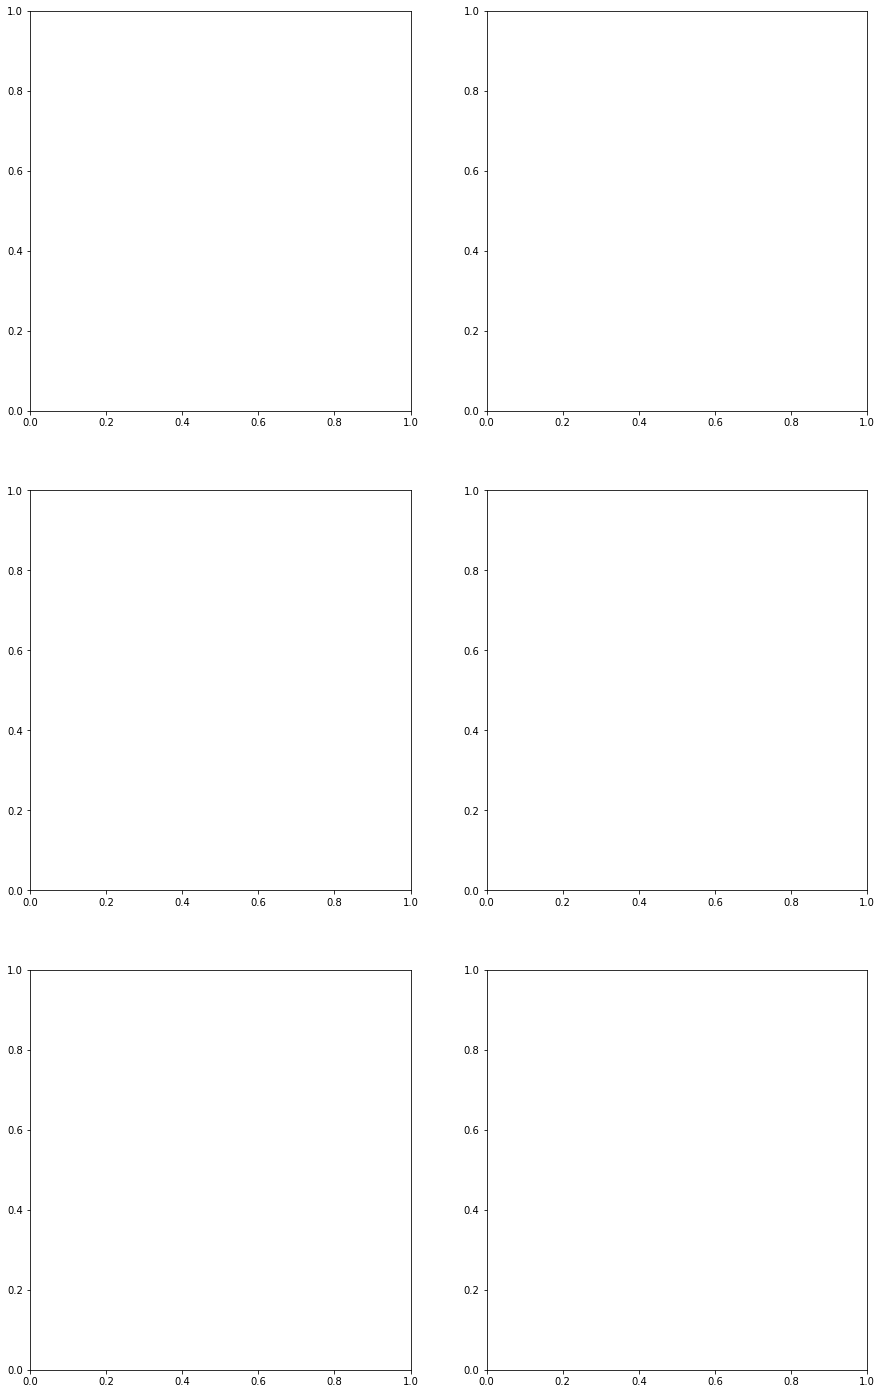

In [46]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC

samplers = [SMOTE(random_state=0), SMOTEENN(random_state=0), SMOTETomek(random_state=0)]

fig, axs = plt.subplots(3, 2, figsize=(15, 25))
for ax, sampler in zip(axs, samplers):
    clf = make_pipeline(sampler, LinearSVC()).fit(X, y)
    plot_decision_function(X, y, clf, ax[0])
    plot_resampling(X, y, sampler, ax[1])
fig.tight_layout()

plt.show()

In [19]:
ros =SMOTE(sampling_strategy='auto',random_state=0,k_neighbors=5,n_jobs=5)
X_res,y_res=ros.fit_resample(X,y)

In [21]:
X_res.shape , y_res.shape

((9339, 71), (9339,))

In [39]:
sns.scatterplot(data=X_res, x="total_bill", y="tip", hue=y)

ValueError: Could not interpret input 'total_bill'

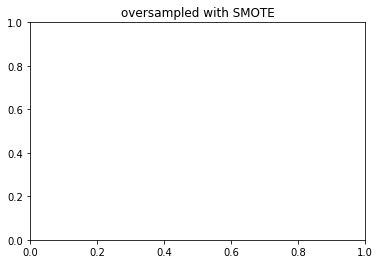

In [37]:
plt.title("oversampled with SMOTE")
plt.show()